### Spam Mail Detection

In [2]:
import numpy as np
import pandas as pd
import nltk

In [3]:
dl = pd.read_excel(r'/content/drive/MyDrive/spam mail detection/Spam-Mail-Detection-main/Spam-Mail-Detection-main/emails.xlsx')
dl

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5721,Subject: re : research and development charges...,0
5722,"Subject: re : receipts from visit jim , than...",0
5723,Subject: re : enron case study update wow ! a...,0
5724,"Subject: re : interest david , please , call...",0


In [4]:
dl=dl.iloc[:,:2]
dl.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
dl['spam'][1381]

0

In [6]:
dl.drop(1381,axis=0,inplace=True)

In [7]:
dl.drop(2652,axis=0,inplace=True)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## EDA

In [ ]:
dl['spam'].value_counts()

0    4357
1    1367
Name: spam, dtype: int64

In [ ]:
dl.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
import string
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)

dl['text']= dl['text'].apply(lambda x: remove_punctuations(x))
dl.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is...,1
2,Subject unbelievable new homes made easy im w...,1
3,Subject 4 color printing special request addi...,1
4,Subject do not have money get software cds fr...,1


In [8]:
dl['text'] = dl['text'].str.replace('Subject', '')
dl.head()

,text,spam
0,: naturally irresistible your corporate identi...,1
1,: the stock trading gunslinger fanny is merri...,1
2,: unbelievable new homes made easy im wanting...,1
3,: 4 color printing special request additional...,1
4,": do not have money , get software cds from he...",1


In [9]:
dl.dropna(inplace=True)

In [10]:
dl.drop_duplicates(inplace=True)

In [11]:
# Check if any duplicate values and remove them
dl.duplicated().sum()

0

In [12]:
dl.shape

(5691, 2)

In [14]:
Y = dl['spam']
X = dl

In [15]:
X.drop('spam',axis=1,inplace=True)

In [16]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_re,Y_re = rus.fit_resample(X,Y)

In [17]:
X_re

,text
3500,: livelink access - - - - - - - - - - - - - -...
1385,: it purchasing process as you all may be awa...
5104,: re : ut conference trustees ' meeting vince...
1952,: re : enl - dailyupdate - txt you have been ...
5646,: california update 5 / 4 / 01 if you have an...
...,...
1363,: are you ready to get it ? hello ! viagra i...
1364,: would you like a $ 250 gas card ? don ' t l...
1365,": immediate reply needed dear sir , i am dr ..."
1366,: wanna see me get fisted ? fist bang will s...


In [18]:
Y_re

,spam
3500,0
1385,0
5104,0
1952,0
5646,0
...,...
1363,1
1364,1
1365,1
1366,1


In [19]:
m = pd.DataFrame(Y_re)
m

,spam
3500,0
1385,0
5104,0
1952,0
5646,0
...,...
1363,1
1364,1
1365,1
1366,1


In [20]:
X_re.insert(loc=1,column='gt',value=Y_re)

In [21]:
X_re

,text,gt
3500,: livelink access - - - - - - - - - - - - - -...,0
1385,: it purchasing process as you all may be awa...,0
5104,: re : ut conference trustees ' meeting vince...,0
1952,: re : enl - dailyupdate - txt you have been ...,0
5646,: california update 5 / 4 / 01 if you have an...,0
...,...,...
1363,: are you ready to get it ? hello ! viagra i...,1
1364,: would you like a $ 250 gas card ? don ' t l...,1
1365,": immediate reply needed dear sir , i am dr ...",1
1366,: wanna see me get fisted ? fist bang will s...,1


In [ ]:
X_re['gt'].value_counts()

0    1367
1    1367
Name: gt, dtype: int64

In [22]:
X_re.rename(columns={'gt':'target'},inplace=True)

In [23]:
data = X_re

In [24]:
data.head()

,text,target
3500,: livelink access - - - - - - - - - - - - - -...,0
1385,: it purchasing process as you all may be awa...,0
5104,: re : ut conference trustees ' meeting vince...,0
1952,: re : enl - dailyupdate - txt you have been ...,0
5646,: california update 5 / 4 / 01 if you have an...,0


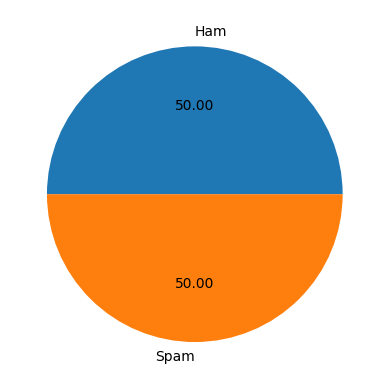

In [25]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
data['num_characters'] = data['text'].apply(len)

In [32]:
data.head()

,text,target,num_characters
3500,: livelink access - - - - - - - - - - - - - -...,0,726
1385,: it purchasing process as you all may be awa...,0,726
5104,: re : ut conference trustees ' meeting vince...,0,881
1952,: re : enl - dailyupdate - txt you have been ...,0,174
5646,: california update 5 / 4 / 01 if you have an...,0,6078


In [40]:
import nltk
nltk.download('punkt_tab')

#num of words
data['text'].apply(lambda x:nltk.word_tokenize(x))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,text
3500,"[:, livelink, access, -, -, -, -, -, -, -, -, ..."
1385,"[:, it, purchasing, process, as, you, all, may..."
5104,"[:, re, :, ut, conference, trustees, ', meetin..."
1952,"[:, re, :, enl, -, dailyupdate, -, txt, you, h..."
5646,"[:, california, update, 5, /, 4, /, 01, if, yo..."
...,...
1363,"[:, are, you, ready, to, get, it, ?, hello, !,..."
1364,"[:, would, you, like, a, $, 250, gas, card, ?,..."
1365,"[:, immediate, reply, needed, dear, sir, ,, i,..."
1366,"[:, wan, na, see, me, get, fisted, ?, fist, ba..."


In [41]:
#num of words
data['text'].apply(lambda x:nltk.word_tokenize(x))

,text
3500,"[:, livelink, access, -, -, -, -, -, -, -, -, ..."
1385,"[:, it, purchasing, process, as, you, all, may..."
5104,"[:, re, :, ut, conference, trustees, ', meetin..."
1952,"[:, re, :, enl, -, dailyupdate, -, txt, you, h..."
5646,"[:, california, update, 5, /, 4, /, 01, if, yo..."
...,...
1363,"[:, are, you, ready, to, get, it, ?, hello, !,..."
1364,"[:, would, you, like, a, $, 250, gas, card, ?,..."
1365,"[:, immediate, reply, needed, dear, sir, ,, i,..."
1366,"[:, wan, na, see, me, get, fisted, ?, fist, ba..."


In [42]:
data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

,text
3500,180
1385,130
5104,168
1952,37
5646,1170
...,...
1363,75
1364,40
1365,575
1366,140


In [43]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
data.head()

,text,target,num_characters,num_words
3500,: livelink access - - - - - - - - - - - - - -...,0,726,180
1385,: it purchasing process as you all may be awa...,0,726,130
5104,: re : ut conference trustees ' meeting vince...,0,881,168
1952,: re : enl - dailyupdate - txt you have been ...,0,174,37
5646,: california update 5 / 4 / 01 if you have an...,0,6078,1170


In [45]:
#num of sentences
data['text'].apply(lambda x:nltk.sent_tokenize(x))

,text
3500,[: livelink access - - - - - - - - - - - - - ...
1385,[: it purchasing process as you all may be aw...
5104,[: re : ut conference trustees ' meeting vinc...
1952,[: re : enl - dailyupdate - txt you have been...
5646,[: california update 5 / 4 / 01 if you have a...
...,...
1363,"[: are you ready to get it ?, hello !, viagra ..."
1364,"[: would you like a $ 250 gas card ?, don ' t ..."
1365,"[: immediate reply needed dear sir , i am dr..."
1366,"[: wanna see me get fisted ?, fist bang will ..."


In [46]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [47]:
data.head()

,text,target,num_characters,num_words,num_sentences
3500,: livelink access - - - - - - - - - - - - - -...,0,726,180,5
1385,: it purchasing process as you all may be awa...,0,726,130,7
5104,: re : ut conference trustees ' meeting vince...,0,881,168,11
1952,: re : enl - dailyupdate - txt you have been ...,0,174,37,2
5646,: california update 5 / 4 / 01 if you have an...,0,6078,1170,51


In [48]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2734.000000,2734.000000,2734.000000
mean,1469.579371,308.416971,19.410388
std,2018.480151,417.894027,35.344448
min,11.000000,4.000000,1.000000
25%,458.250000,92.000000,7.000000
50%,879.000000,191.000000,12.000000
75%,1699.750000,370.500000,21.000000
max,28425.000000,6130.000000,1248.000000


In [49]:
data['target'] = data['target'].astype(int)

In [50]:
#description only for spam mails
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1367.000000,1367.000000,1367.000000
mean,1310.931236,267.020483,18.277249
std,2272.069553,451.762833,28.139918
min,11.000000,4.000000,1.000000
25%,395.000000,79.000000,6.000000
50%,687.000000,140.000000,11.000000
75%,1245.500000,251.000000,18.000000
max,28425.000000,6130.000000,438.000000


In [51]:
#description only for ham mails
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1367.000000,1367.000000,1367.000000
mean,1628.227505,349.813460,20.543526
std,1714.302044,376.668522,41.291035
min,27.000000,5.000000,1.000000
25%,585.500000,120.500000,7.000000
50%,1144.000000,245.000000,13.000000
75%,2092.500000,454.000000,23.000000
max,28054.000000,5690.000000,1248.000000


In [52]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

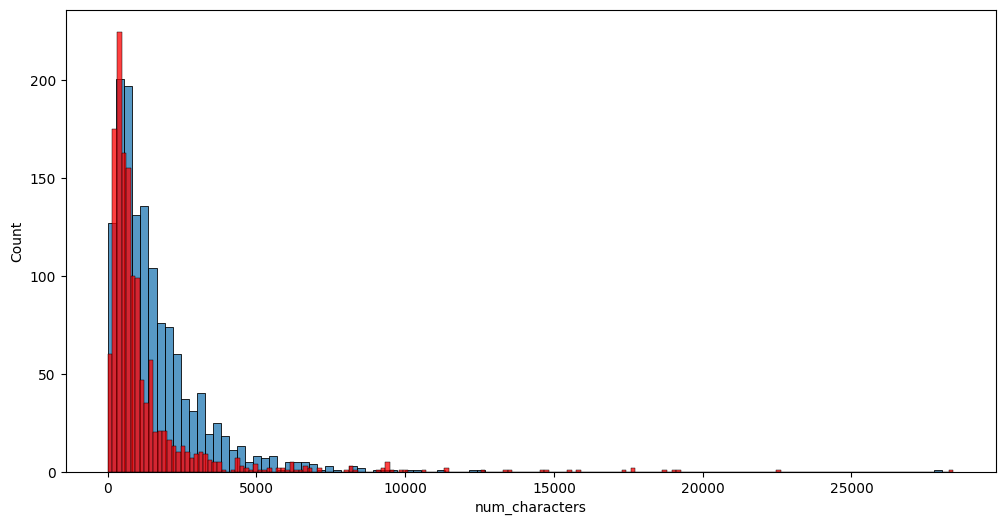

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters']) #for ham
sns.histplot(data[data['target'] == 1]['num_characters'],color='red') #for spam

<Axes: xlabel='num_words', ylabel='Count'>

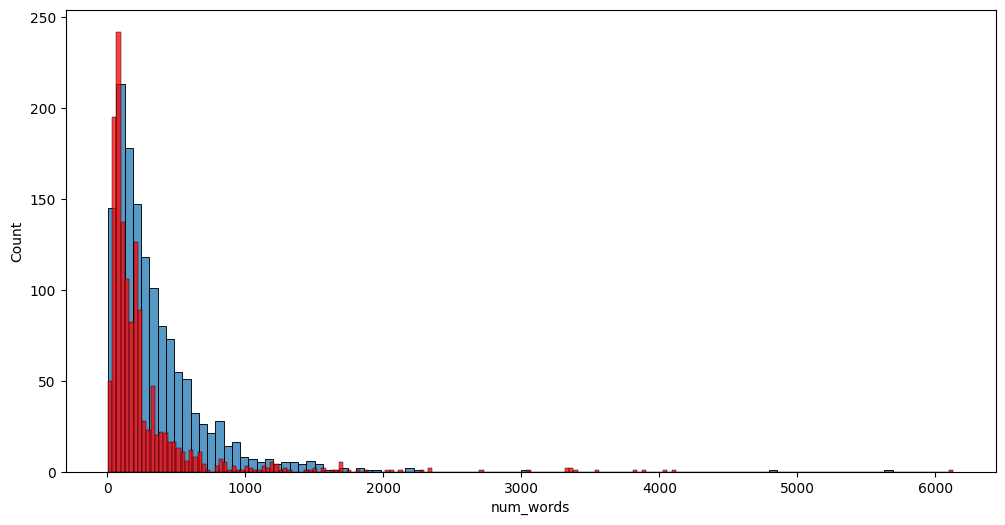

In [54]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words']) #for ham
sns.histplot(data[data['target'] == 1]['num_words'],color='red') #for spam

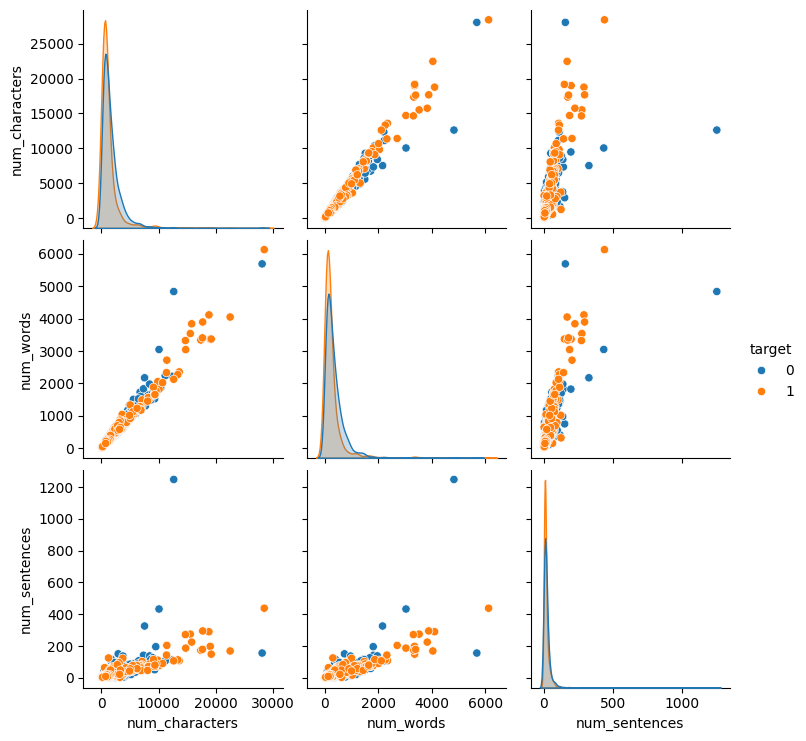

In [55]:
sns.pairplot(data,hue='target')

In [59]:
# Calculate correlation only for numerical columns
numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

                  target  num_characters  num_words  num_sentences
target          1.000000       -0.078612  -0.099078      -0.032066
num_characters -0.078612        1.000000   0.984028       0.694553
num_words      -0.099078        0.984028   1.000000       0.777600
num_sentences  -0.032066        0.694553   0.777600       1.000000


##Data Preprocessing

In [62]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [63]:
import string
from nltk.stem.porter import PorterStemmer

In [64]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [65]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum(): #this is to remove special chars
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i)) #applying stemming

  return " ".join(y)

In [66]:
data['text'].apply(transform_text)

,text
3500,livelink access forward stinson gibner hou ect...
1385,purchas process may awar organ undergo signifi...
5104,ut confer truste meet vinc truste meet dinner ...
1952,enl dailyupd txt subscrib enl dailyupd txt ema...
5646,california updat 5 4 01 question pleas contact...
...,...
1363,readi get hello viagra 1 med struggl men erect...
1364,would like 250 ga card let current high price ...
1365,immedi repli need dear sir dr jame alabi chair...
1366,wan na see get fist fist bang show everyth alw...


In [67]:
data['transformed_text'] = data['text'].apply(transform_text)

In [68]:
data.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
3500,: livelink access - - - - - - - - - - - - - -...,0,726,180,5,livelink access forward stinson gibner hou ect...
1385,: it purchasing process as you all may be awa...,0,726,130,7,purchas process may awar organ undergo signifi...
5104,: re : ut conference trustees ' meeting vince...,0,881,168,11,ut confer truste meet vinc truste meet dinner ...
1952,: re : enl - dailyupdate - txt you have been ...,0,174,37,2,enl dailyupd txt subscrib enl dailyupd txt ema...
5646,: california update 5 / 4 / 01 if you have an...,0,6078,1170,51,california updat 5 4 01 question pleas contact...


In [ ]:
# wordcloud of spam mails
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

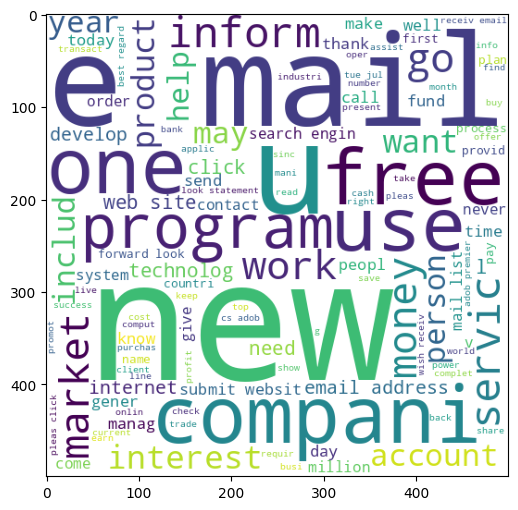

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

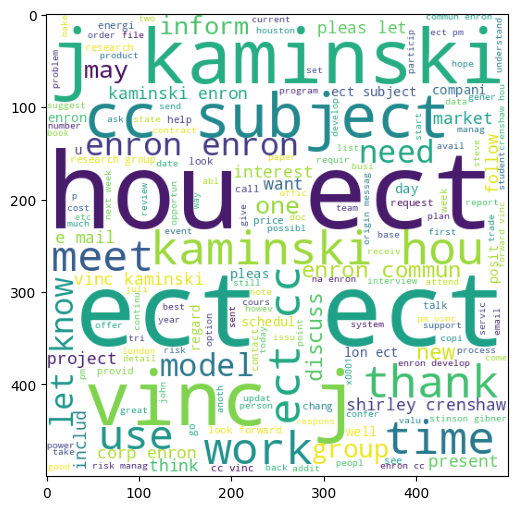

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
data.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,re it was nice meeting you at the informs me...,0,3004,476,1,nice meet inform meet enjoy talk slc confer th...
1,analysis of dabhol energy cost jeff i am f...,0,1196,190,1,analysi dabhol energi cost jeff forward analys...
2,preface for book vince hope you are well...,0,7930,1235,1,prefac book vinc hope well spoke ago write pre...
3,wharton program for business journalists hi ...,0,3720,608,1,wharton program busi journalist hi greg inform...
4,oracle nt client software upgrade manual upg...,0,1163,186,1,oracl nt client softwar upgrad manual upgrad s...


In [ ]:
data[data['target'] == 1]['transformed_text'].tolist()

['natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morrist

In [ ]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

173094

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30) #gives most commonly occuring 30 words

[('compani', 1065),
 ('com', 999),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 698),
 ('get', 693),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('3', 604),
 ('free', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507)]

##Model Building

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [76]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [77]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0]])

In [78]:
X.shape

(2734, 21847)

In [79]:
y = data['target'].values

In [80]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [83]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [84]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9561243144424132
[[255   7]
 [ 17 268]]
0.9745454545454545


In [85]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9817184643510055
[[253   9]
 [  1 284]]
0.9692832764505119


In [86]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9670932358318098
[[244  18]
 [  0 285]]
0.9405940594059405


In [87]:
# since we've used countvectorizer(bag of words) let's now try with tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()#max_features=3000

In [88]:
X = tfidf.fit_transform(data['transformed_text']).toarray() # and y remains same

In [89]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [90]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.946983546617916
[[246  16]
 [ 13 272]]
0.9444444444444444


In [91]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.979890310786106
[[256   6]
 [  5 280]]
0.9790209790209791


In [92]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9670932358318098
[[244  18]
 [  0 285]]
0.9405940594059405


In [70]:
# we'll now consider many other models and compare them with our mnb model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [71]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)

In [72]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'RF': rfc,
}

In [73]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [93]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9890310786106032
Precision -  0.979381443298969
For  KN
Accuracy -  0.9689213893967094
Precision -  0.971830985915493
For  NB
Accuracy -  0.979890310786106
Precision -  0.9790209790209791
For  RF
Accuracy -  0.979890310786106
Precision -  0.9691780821917808


In [94]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [95]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.989031,0.979381
2,NB,0.979890,0.979021
3,RF,0.979890,0.969178
1,KN,0.968921,0.971831


##Improvements

In [96]:
# let's now try to improve the performance of our models
# 1. change the max_features parameter of tfidf to 3000 meaning top most imp 3000 words only.

In [97]:
# since we've used countvectorizer(bag of words) let's now try with tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [98]:
X = tfidf.fit_transform(data['transformed_text']).toarray() # and y remains same

In [99]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [100]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [101]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9853747714808044
Precision -  0.9792387543252595
For  KN
Accuracy -  0.9689213893967094
Precision -  0.9620689655172414
For  NB
Accuracy -  0.9835466179159049
Precision -  0.9758620689655172
For  RF
Accuracy -  0.9817184643510055
Precision -  0.9757785467128027


In [103]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Accuracy_max_ft_3000',ascending=False)

In [104]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.985375,0.979239
2,NB,0.983547,0.975862
3,RF,0.981718,0.975779
1,KN,0.968921,0.962069


In [105]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [106]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.989031,0.979381,0.985375,0.979239
1,NB,0.979890,0.979021,0.983547,0.975862
2,RF,0.979890,0.969178,0.981718,0.975779
3,KN,0.968921,0.971831,0.968921,0.962069


In [107]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [108]:
X.shape

(2734, 3000)

In [109]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [110]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [111]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9140767824497258
Precision -  0.925
For  KN
Accuracy -  0.7696526508226691
Precision -  0.6934306569343066
For  NB
Accuracy -  0.9707495429616088
Precision -  0.9686411149825784
For  RF
Accuracy -  0.9817184643510055
Precision -  0.9757785467128027


In [112]:
# 2. apply scaling
# let's try with scaling
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Accuracy_scaling',ascending=False)

In [113]:
temp_df1

,Algorithm,Accuracy_scaling,Precision_scaling
3,RF,0.981718,0.975779
2,NB,0.970750,0.968641
0,SVC,0.914077,0.925000
1,KN,0.769653,0.693431


In [114]:
new_df_scaled = new_df.merge(temp_df1,on='Algorithm')

In [115]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.989031,0.979381,0.985375,0.979239,0.914077,0.925000
1,NB,0.979890,0.979021,0.983547,0.975862,0.970750,0.968641
2,RF,0.979890,0.969178,0.981718,0.975779,0.981718,0.975779
3,KN,0.968921,0.971831,0.968921,0.962069,0.769653,0.693431


In [117]:
# improvement using voting classifier
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)

from sklearn.ensemble import VotingClassifier

In [121]:
voting = VotingClassifier(estimators=[('nb',mnb),('rf',rf),('etc',etc),('svm',svc)],voting='soft')

In [120]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# improvement using voting classifier
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2) # Define etc here


voting = VotingClassifier(estimators=[('nb', mnb), ('rf', rf), ('etc', etc), ('svm', svc)], voting='soft')

In [122]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [123]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9835466179159049
Precision :  0.9726027397260274


In [124]:
voting = VotingClassifier(estimators=[('nb',mnb),('rf',rf),('etc',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [125]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9817184643510055
Precision :  0.9725085910652921


In [126]:
voting = VotingClassifier(estimators=[('nb',mnb),('etc',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [127]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9780621572212066
Precision :  0.9690721649484536


In [130]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.4789762340036563
Precision :  0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


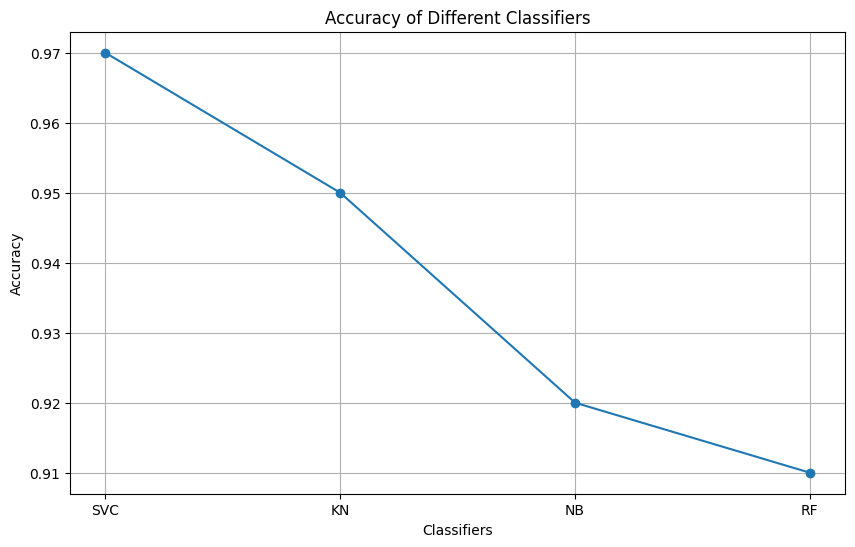

In [132]:
# prompt: write a code for draw graph for accuracy fo all given classifiers line indicatin type fraph

import matplotlib.pyplot as plt

# Assuming accuracy_scores and clfs.keys() are defined as in your original code
accuracy_scores = [0.97, 0.95, 0.92, 0.91] # Example accuracy scores. Replace with your actual scores
classifier_names = list(clfs.keys())  # Assuming 'clfs' is a dictionary of classifiers as in your code


plt.figure(figsize=(10, 6))
plt.plot(classifier_names, accuracy_scores, marker='o', linestyle='-')
plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classifiers")
plt.grid(True)
plt.show()
